In [18]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [19]:
from society.agents import AnalyticalAgent
from society.structure.network import RealNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
import networkx as nx
from plotting.basic import *
from matplotlib import pyplot as plt
from computations.insights.relative import diversity, disagreement
from plotting.summaries import *
from utils.io import save_arrays

In [20]:
data_path = '../../../../results/data/real_networks/Twitter/'

In [21]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.15)
belief_distribution = BeliefDistribution(unique, linespace)
network = RealNetwork("Twitter", "../../../../data/")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

update_rule = UpdateRule(assimilation_bias=0, evaluation_bias=0, rewire_probability=0)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

# Network Stats

In [22]:
G = agent_network.network.G

In [23]:
size = G.number_of_nodes()
size

81306

In [24]:
edges = G.number_of_edges()
edges

1342296

In [25]:
degrees = dict(G.degree()).values()
sum_of_edges = sum(degrees)
average_degree = sum_of_edges/size
average_degree

33.01837502767324

In [26]:
nx.average_clustering(G)

0.565311468612065

In [27]:
connected_component = G.subgraph(sorted(nx.connected_components(G))[0])
nx.average_shortest_path_length(connected_component)

In [ ]:
LCC = max([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
LCC

# Total Consensus

In [5]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [17:23<00:00,  1.04s/it]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


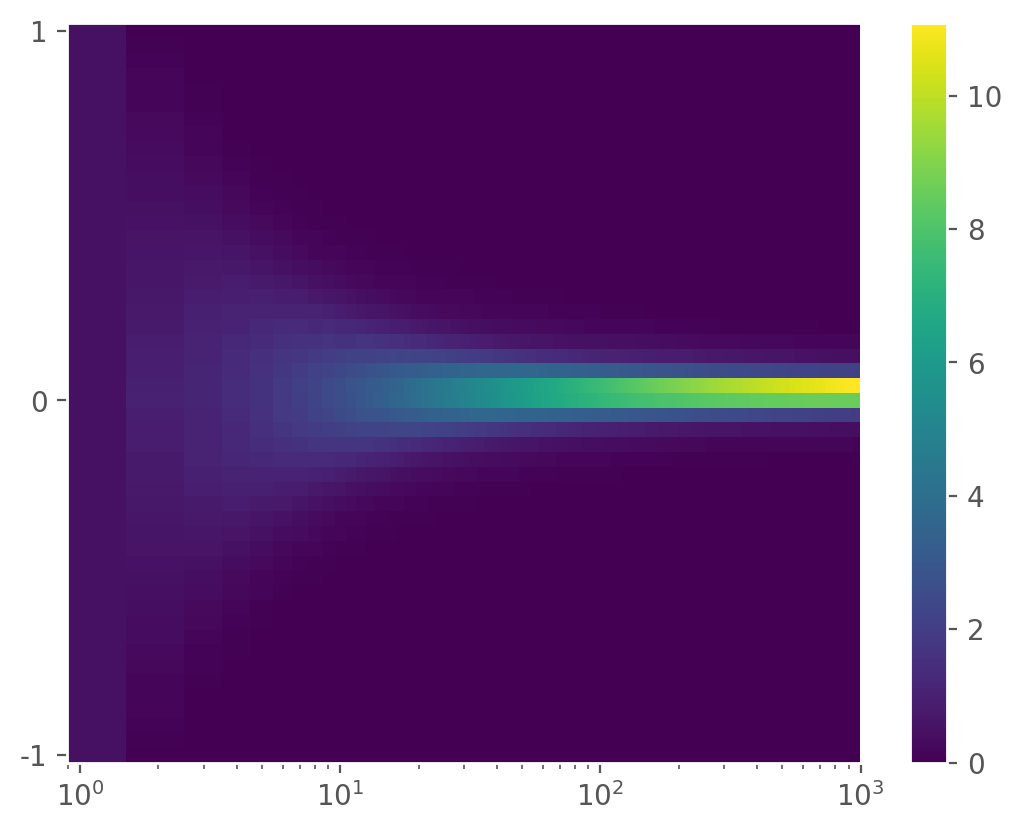

In [6]:
# Store results
with open(data_path + 'total_consensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Fragmentation

In [7]:
interactions.update_rule.evaluation_bias = 0.3
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [17:07<00:00,  1.03s/it]


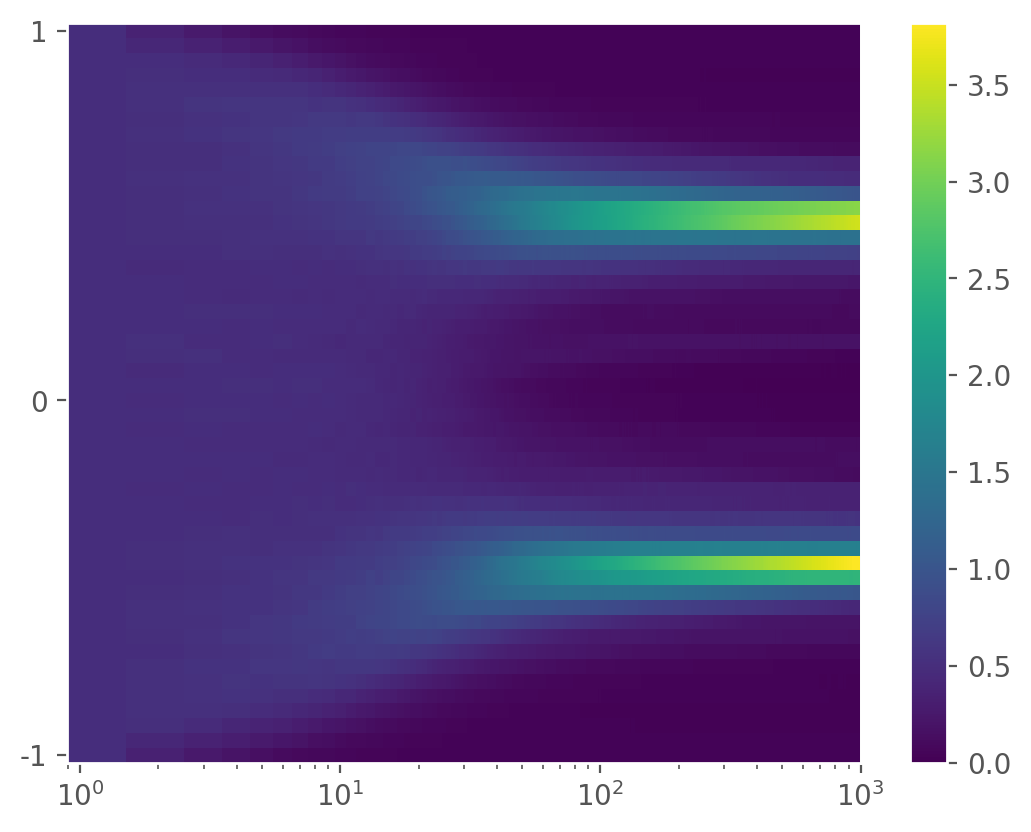

In [8]:
# Store results
with open(data_path + 'clustering.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Dissensus

In [9]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 1
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [16:29<00:00,  1.01it/s]


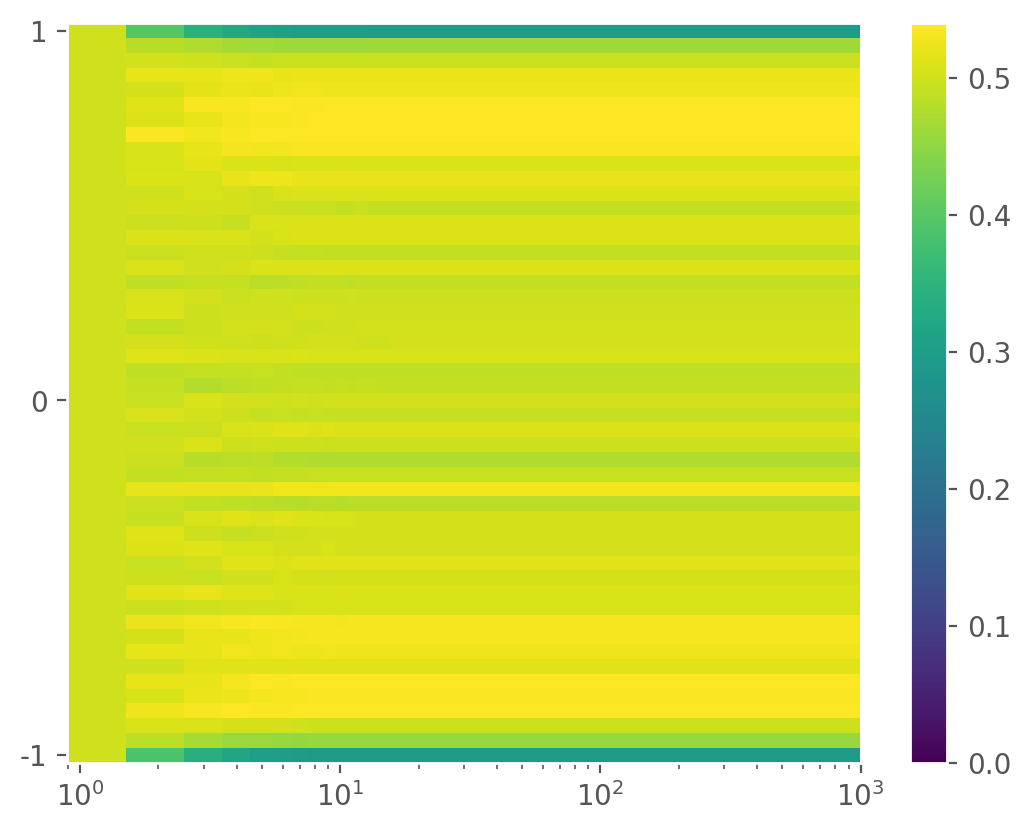

In [10]:
# Store results
with open(data_path + 'dissensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Polarisation

In [6]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 0
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
extreme_num = agent_network.size//10
agent_network.set_extreme_agents(0.01, extreme_num, extreme_num)
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [17:59<00:00,  1.08s/it]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


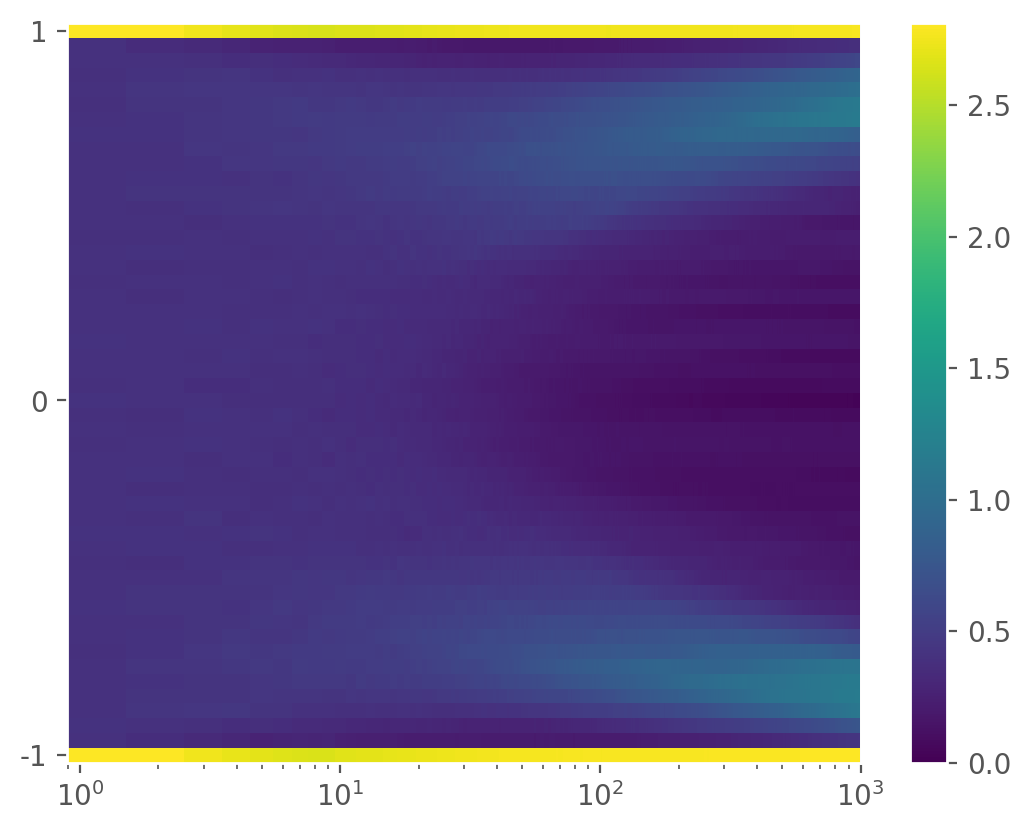

In [7]:
# Store results
with open(data_path + 'polarisation.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)